# Etablir un diagnostic par oeil au lieu de l'individu

## Import

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

## Constantes

In [ ]:
classes_columns = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']

## Lecture du fichier d'annotation

In [2]:
FILEPATH = '/data/workspace_files/Ocular_dataset/ODIR_V2.csv'
df = pd.read_csv(FILEPATH, sep=";", index_col='ID')

In [3]:
df

,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
ID,,,,,,,,,,,,,,
0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,42,Male,2_left.jpg,2_right.jpg,laser spot?moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0
4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0
4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0


In [5]:
df[classes_columns].sum(axis=0)

N 1140
D 1128
G 215
C 212
A 164
H 103
M 174
O 979
dtype: int64

Renommages des colonnes

In [6]:
df.rename(columns={'Patient Sex': 'Sex', 'Patient Age': 'Age', 'Left-Diagnostic Keywords': 'Left_Diagnostic',
                   'Right-Diagnostic Keywords': 'Right_Diagnostic', 'Left-Fundus': 'Left_Fundus',
                   'Right-Fundus': 'Right_Fundus'}, inplace=True)

# Preprocess mots clefs

## Fonctions

Creation d'une colonne "diag_1" pour indiquer le diagnostic et "xx" si plusieurs diagnostique pour l'individu

In [7]:
def analyse_1(x):
    if np.count_nonzero(x) == 1:
        return classes_columns[np.argmax(x)]
    else:
        return 'xx'


df['diag_1'] = df[classes_columns].apply(analyse_1, axis=1)

Creation d'une colonne "diag_cnt" pour indiquer le nombre de diagnostics pour l'individu

In [8]:
def analyse_2(x):
    return np.count_nonzero(x)


df['diag_cnt'] = df[classes_columns].apply(analyse_2, axis=1)

L'objectif est de trouver un ou plusieurs mots utilisés pour chaque pathologie

Repartition du nombre de patients par nombre de pathologie

In [10]:
df['diag_cnt'].value_counts()

1 2914
2 557
3 29
Name: diag_cnt, dtype: int64

Dictionnaire contenant les mots clefs par pathologie

In [10]:
dict1 = {}
for diag in classes_columns:
    dict1[diag] = pd.concat([
        df.loc[(df.diag_cnt == 1) & (df.diag_1 == diag), 'Left_Diagnostic'].str.split('?', expand=True).stack().reset_index(drop=True),
        df.loc[(df.diag_cnt == 1) & (df.diag_1 == diag), 'Right_Diagnostic'].str.split('?',expand=True).stack().reset_index(drop=True)
    ], ignore_index=True)

Affiche les 10 mots clefs les plus representatifs par pathologie

In [11]:
def print_keywords(data):
 
    for i, diag in enumerate(classes_columns):
        df_ = pd.DataFrame(data[diag].value_counts().head(10) )
        df_.columns = ['count']
        df_ = df_.sort_values(by='count', ascending=False)
        print(f"Diagnostique : {diag.upper()}")
        for j in df_.index:
            print("\t", '{:<45}'.format(j), df_['count'][j])


print_keywords(dict1)

Diagnostique : N
	 normal fundus                                 2277
	 lens dust                                     222
	 low image quality                             3
Diagnostique : D
	 moderate non proliferative retinopathy        624
	 mild nonproliferative retinopathy             383
	 normal fundus                                 205
	 severe nonproliferative retinopathy           142
	 low image quality                             16
	 proliferative diabetic retinopathy            14
	 diabetic retinopathy                          4
	 severe proliferative diabetic retinopathy     4
	 optic disk photographically invisible         1
	 no fundus image                               1
Diagnostique : G
	 glaucoma                                      184
	 normal fundus                                 39
	 suspected glaucoma                            14
	 lens dust                                     6
	 optic disk photographically invisible         3
Diagnostique : C
	 cataract   

## Visualisation de la repartition des mots clefs par pathologie

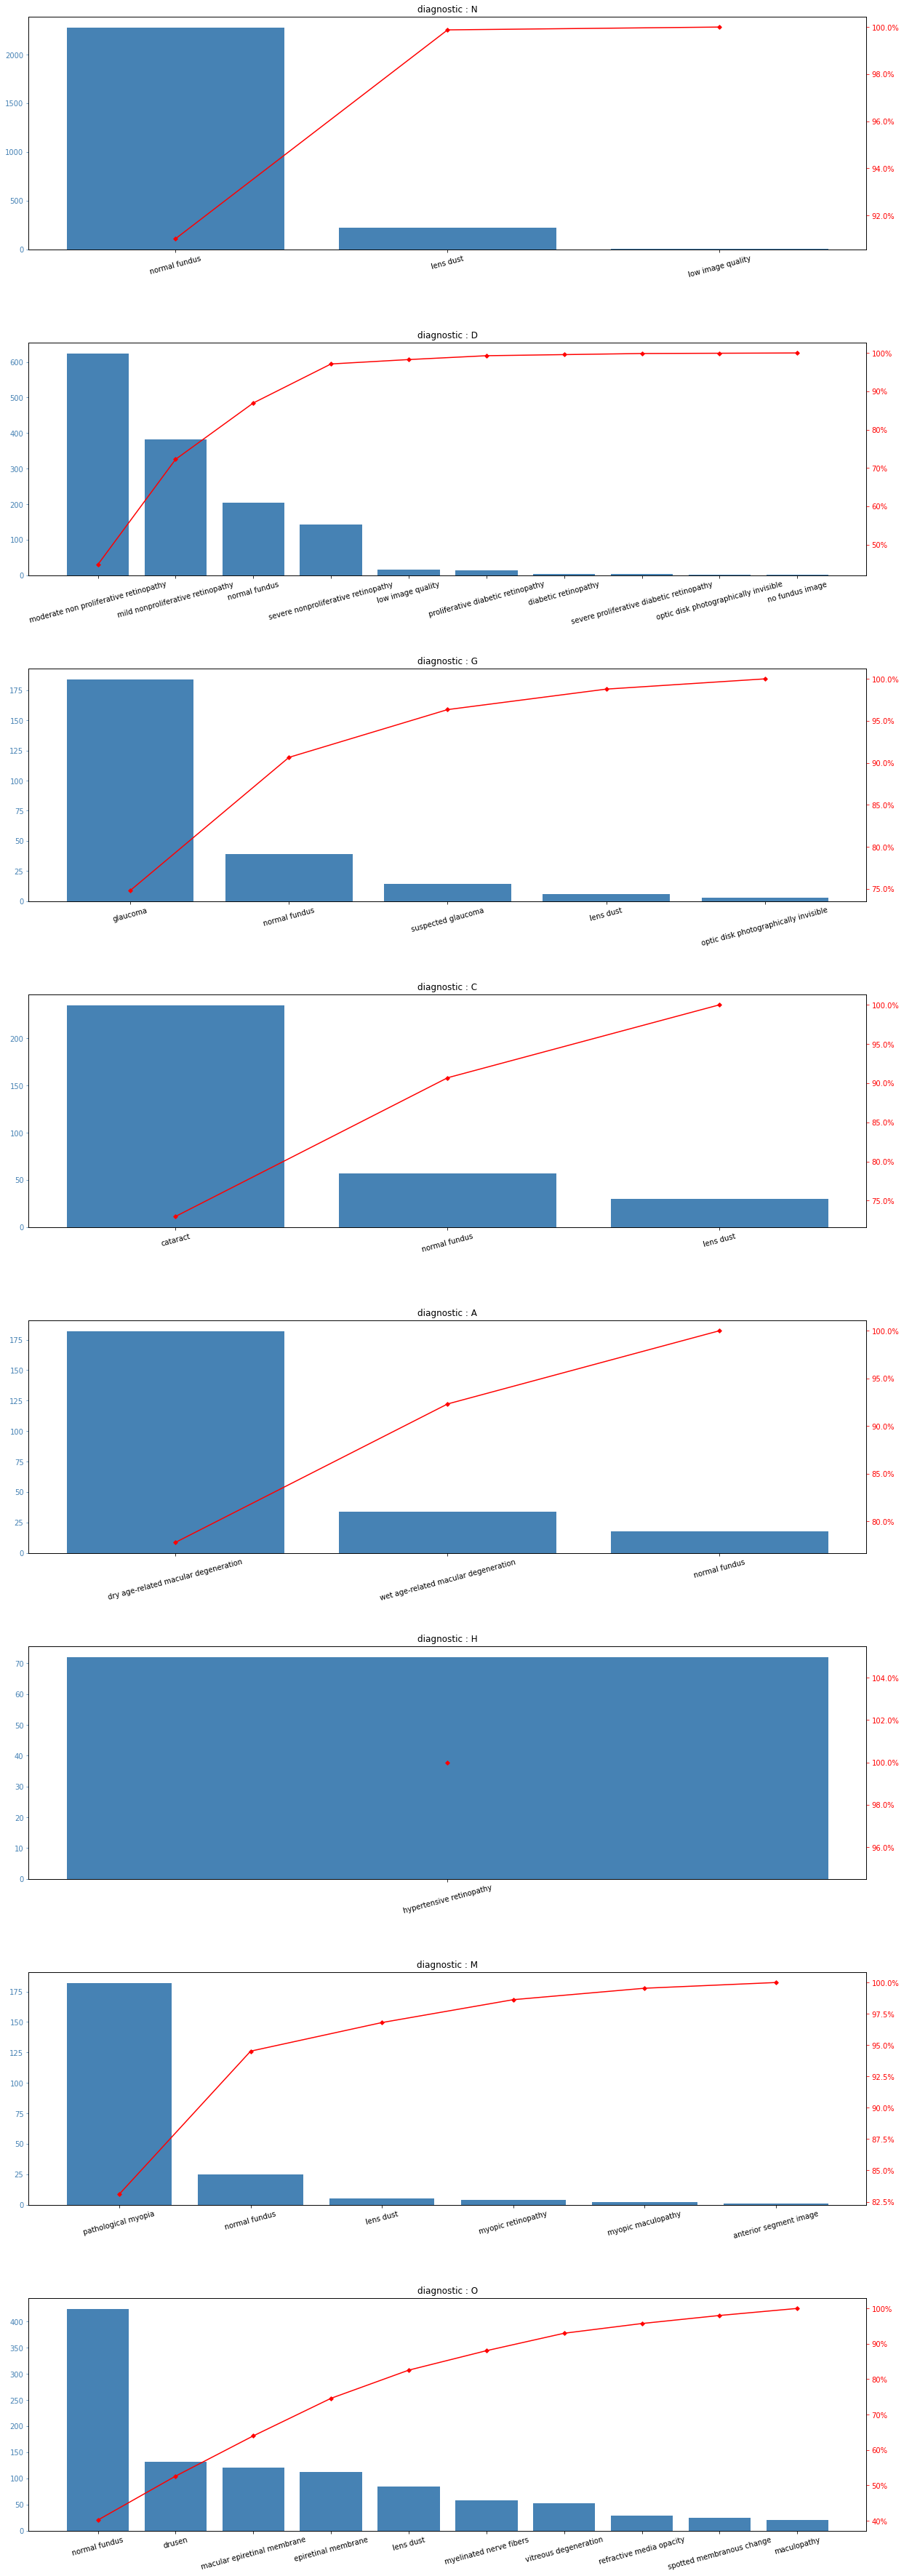

In [13]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter


def plot_pareto(data):
    fig, ax = plt.subplots(len(classes_columns), figsize=(20,60))
    
    for i, diag in enumerate(classes_columns):
        df_ = pd.DataFrame(data[diag].value_counts().head(10) )
        df_.columns = ['count']
        df_ = df_.sort_values(by='count', ascending=False)
        df_['cumperc'] = df_['count'].cumsum() / df_['count'].sum() * 100

        #define aesthetics for plot
        color1 = 'steelblue'
        color2 = 'red'
        line_size = 4

        #create basic bar plot
        
        ax[i].bar(df_.index, df_['count'], color=color1)

        #add cumulative percentage line to plot
        ax2 = ax[i].twinx()
        ax2.plot(df_.index, df_['cumperc'], color=color2, marker="D", ms=line_size)
        ax2.yaxis.set_major_formatter(PercentFormatter())

        #specify axis colors
        ax[i].set_title(f'diagnostic : {diag}')
        ax[i].tick_params(axis='y', colors=color1)
        ax[i].tick_params(axis='x', rotation=15)
        ax2.tick_params(axis='y', colors=color2)

    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
    plt.show()


plot_pareto(dict1 )

## Dictionnaire mots clefs

Le dictionnaire 'dict_diag' contient les mots clefs pour chaque pathologie.

Le diagnostic 'B' (bad) sert à identifier les images de qualités insuffisantes

In [12]:
dict_diag = {'N': ['normal fundus'],
             'D': ['moderate non proliferative retinopathy', 'nonproliferative retinopathy', 'diabetic retinopathy'],
             'G': ['glaucoma'],
             'C': ['cataract'],
             'A': ['macular degeneration'],
             'H': ['hypertensive retinopathy'],
             'M': ['myopia', 'myopic'],
             'B': ['lens dust', 'anterior segment image', 'optic disk photographically invisible', 'low image quality',
                   'laser', 'no fundus image', 'drusen', 'white vessel']}

# Determination du diagnostic de l'oeil gauche et de l'oeil droit

## Fonctions

In [13]:
def find_words(str, lst):
    """
    Fonction permettant de tester de la presence de l'un des mots (lst) dans la phrase (str)
    :param str:
    :param lst:
    :return: 1 = presence d'au moins de l'un des mots
    """
    for wrd in lst:
        if str.find(wrd) >= 0:
            return 1
    return 0

In [19]:
def compute_diag(x):
    """
    Fonction permettant de determiner le diagnostic à partir de la liste des mots cles (cf. dict_diag)
    :param x:
    :return:
    """
    #determination des pathologies
    is_Bad = find_words(x, dict_diag['B']) > 0
    is_N = find_words(x, dict_diag['N']) > 0
    is_M = find_words(x, dict_diag['M']) > 0
    is_H = find_words(x, dict_diag['H']) > 0
    is_D = find_words(x, dict_diag['D']) > 0
    is_G = find_words(x, dict_diag['G']) > 0
    is_C = find_words(x, dict_diag['C']) > 0
    is_A = find_words(x, dict_diag['A']) > 0

    #detection de multipathologie
    is_Dup = (is_M + is_H + is_D + is_G + is_C + is_A)>1

    tmp = 'O'
    if is_Bad :
        tmp = 'B'
    else:
        if not is_Dup:
            if is_N:
                tmp = 'N'
            if is_M:
                tmp = 'M'
            if is_H:
                tmp = 'H'
            if is_D:
                tmp = 'D'
            if is_G:
                tmp = 'G'
            if is_C:
                tmp = 'C'
            if is_A:
                tmp = 'A'
        else:
            tmp = 'X'

    return tmp


df['diag_Left'] = df['Left_Diagnostic'].apply(compute_diag)
df['diag_Right'] = df['Right_Diagnostic'].apply(compute_diag)

In [20]:
df['diag_Right'].value_counts()

N 1383
D 779
B 359
O 342
C 130
M 128
A 123
G 111
X 89
H 56
Name: diag_Right, dtype: int64

# Dataframe final

Creation d'un dataframe avec l'ID de l'individu, le nom de fichier image et le diagnostic

In [21]:
df_eyes_right = df[['Right_Fundus', 'diag_Right']]
df_eyes_right['ID'] = df.index;
df_eyes_right.rename(columns={'Right_Fundus': 'Fundus',
                              'diag_Right': 'Diag'}, inplace=True)
df_eyes_right.drop(df_eyes_right[(df_eyes_right['Diag'] == 'B')].index, inplace=True)
df_eyes_right.drop(df_eyes_right[(df_eyes_right['Diag'] == 'X')].index, inplace=True)

<ipython-input-21-13e30ef564a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eyes_right['ID'] = df.index;
/opt/python/envs/default/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/opt/python/envs/default/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

In [22]:
df_eyes_left = df[['Left_Fundus', 'diag_Left']]
df_eyes_left['ID'] = df.index;
df_eyes_left.rename(columns={'Left_Fundus': 'Fundus',
                             'diag_Left': 'Diag'}, inplace=True)
df_eyes_left.drop(df_eyes_left[(df_eyes_left['Diag'] == 'B')].index, inplace=True)
df_eyes_left.drop(df_eyes_left[(df_eyes_left['Diag'] == 'X')].index, inplace=True)

<ipython-input-22-f341bf90118b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eyes_left['ID'] = df.index;


In [24]:
df_tmp = pd.concat([df_eyes_left, df_eyes_right], ignore_index=True)

In [25]:
df_eyes = pd.concat([pd.concat([df_eyes_left, df_eyes_right], ignore_index=True), pd.get_dummies(df_tmp.Diag)], axis=1)

## Suppression des images

Suppression des images suivants les recommandations du fichier d'annotation

In [26]:
lst_img_to_delete = ['2174_right.jpg', '2175_left.jpg', '2176_left.jpg', '2177_left.jpg', '2177_right.jpg',
                     '2178_right.jpg',
                     '2179_left.jpg', '2179_right.jpg', '2180_left.jpg', '2180_right.jpg', '2181_left.jpg',
                     '2181_right.jpg', '2182_left.jpg',
                     '2182_right.jpg', '2957_left.jpg', '2957_right.jpg']

In [27]:
for img_name in lst_img_to_delete:
    print(f'{img_name}  {df_eyes[df_eyes.Fundus == img_name].index}')
    df_eyes.drop(df_eyes[df_eyes.Fundus == img_name].index, inplace=True)

2174_right.jpg  Int64Index([4388], dtype='int64')
2175_left.jpg  Int64Index([1340], dtype='int64')
2176_left.jpg  Int64Index([1341], dtype='int64')
2177_left.jpg  Int64Index([], dtype='int64')
2177_right.jpg  Int64Index([4391], dtype='int64')
2178_right.jpg  Int64Index([4392], dtype='int64')
2179_left.jpg  Int64Index([1343], dtype='int64')
2179_right.jpg  Int64Index([4393], dtype='int64')
2180_left.jpg  Int64Index([1344], dtype='int64')
2180_right.jpg  Int64Index([4394], dtype='int64')
2181_left.jpg  Int64Index([1345], dtype='int64')
2181_right.jpg  Int64Index([4395], dtype='int64')
2182_left.jpg  Int64Index([1346], dtype='int64')
2182_right.jpg  Int64Index([4396], dtype='int64')
2957_left.jpg  Int64Index([1958], dtype='int64')
2957_right.jpg  Int64Index([5011], dtype='int64')


In [28]:
df_eyes = df_eyes.sort_values('ID').reset_index(drop=True)

## Sauvegarde du dataframe dans un fichier CSV

In [29]:
df_eyes.to_csv('/data/workspace_files/Ocular_dataset/ODIR_EYE_preprocess.csv')

## Repartition des diagnostics

N    2816
D    1524
O     648
C     252
M     244
G     242
A     241
H     110
Name: Diag, dtype: int64


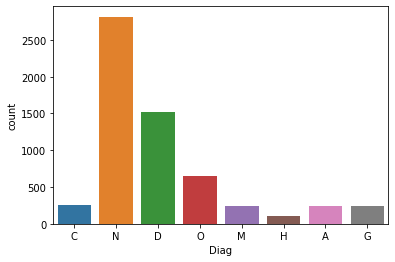

In [30]:
sns.countplot(x='Diag', data=df_eyes)
print(df_eyes.Diag.value_counts())